# Front matter

Qt is structured in a few modules. The most importants for us now are:
- QtCore. Non-GUI "core" functionality"
- QtGui. GUI functionality (buttons, sliders, etc.)
- QtWidgets. "Widgets" are UI elements that compose what we identify as "windows"

In [2]:
import sys
from PyQt5 import QtCore as QtC, QtWidgets as QtW, QtGui as QtG

To me, the division between QtGui and QtWidgets seems a bit arbitrary, and very often I do not know where to find a specific class.

By far, most of the time I get information from:
- https://doc.qt.io/qt-5/

That is Qt's documentation, and it is useful even though it is for the C++ API. The PyQt documentation is not as good. They also have a wiki at https://wiki.qt.io/Main, but it seems to have outdated info, as always with wikis...

There are these tutorials around:
- https://www.learnpyqt.com/
- http://zetcode.com/gui/qt5/
- https://www.bogotobogo.com/Qt/Qt5_TutorialHelloWorld.php

# Hello World

This is the simplest application.

Things to note here:
- a widget
- command line arguments
- the event loop
- how does the event loop end? (last window closed or app.quit)

In [2]:
def main():
    
    
    main_window = QtW.QWidget()
    main_window.show()
    app.exec()
    
main()

Let's add a label to the display.

In [3]:
def main():
    app = QtW.QApplication([])
    main_window = QtW.QWidget()
    label = QtW.QLabel('Hello World', main_window)
    main_window.show()
    app.exec()
    
main()

at this point we can note several things:
- layout is not nice, we might want the label centered, etc.
- How can I control fonts and such?

We'll see these things later. But before we do that, we normally keep main() as lean as possible, and instead encapsulate everything into a custom widget (which inherits from QWidget)

In [3]:
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        self.label = QtW.QLabel('Hello World', self)
        

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

# Expanding on Hello World

Let's expand on the previous Hello World example. Let's change it so we can edit the text in the widget. I will:
- add a button
- clicking the button will show dialog

While doing this, we will discuss about:
- signals and slots
- managing the layout

In [5]:
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World', self)
        self.button = QtW.QPushButton('Change text', self)

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

here we experiment. What happens if I do not give the `sels` argument to the QPushButton? It does not appear! Why is that. This is a good time to talk about the ownership in Qt, which is more of an issue in C++ than in Python.

as you can see... the button and the label show up, but there are a few kinks:
- one is on top of the other! Not what we expected.
- clicking the button does nothing

Let's see how we can fix this

## Layouts

One can position the widgets "by hand", but that is burdensome. One has to do this whenever the widget is resized, and this is done by implementing the resizeEvent method.

In [35]:
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World', self)
        #self.label.setAlignment(QtC.Qt.AlignHCenter | QtC.Qt.AlignVCenter)
        self.button = QtW.QPushButton('Change text', self)
        
        h = self.label.height()
        self.button.move(0, h)

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

Here you might have noted the following:
- most enumeration types are within QtC.Qt... how could one figure that out?
- I placed the window by "moving" it. Its default position is (0,0) in window coordinates. We can discuss windows coordinates.

However, the easiest way to organize widgets within my window is with Qt's layout classes. There are three common classes:
- QVBoxLayout
- QHBoxLayout
- QGridBoxLayout

For more information: https://doc.qt.io/qt-5/layout.html

In [34]:
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World')
        self.label.setAlignment(QtC.Qt.AlignHCenter | QtC.Qt.AlignTop)
        self.button = QtW.QPushButton('Change text')
        
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.label)
        layout.addWidget(self.button)
        self.setLayout(layout)
        

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

and here you might have noted the following:
- most enumeration types are within QtC.Qt (https://doc.qt.io/qt-5/qt.html). How could one figure that out???

## Signals and Slots

now let's add some interactivity. Let's add a button, and print something to the screen when it is clicked.

This is the time to talk about signals and slots (https://doc.qt.io/qt-5/signalsandslots.html).

Signals and slots are used for communication between objects. The signals and slots mechanism is a central feature of Qt. While other frameworks might use what are called "event handlers", and we will see examples of those, a lot of the interaction in Qt is based on signals/slots.

- All classes that inherit from QObject can contain signals and slots. Signals are emitted by objects when they change their state in a way that may be interesting to other objects, but the object does not know or care whether anything is receiving the signals it emits. You can even connect a signal to another signal.
- A slot is also a normal member function. An object does not care who emitted the signal ir who is making the call.

The details might be more important when talking about C++. In PyQt this just works.

In [7]:
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World!')
        self.button = QtW.QPushButton('Change text')
        
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.label)
        layout.addWidget(self.button)
        self.setLayout(layout)
        
        self.button.clicked.connect(self.clicked)
        
    def clicked(self, event):
        print('the button was clicked!')

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

## A Dialog

Now let's show a dialog to change the label text. This is what we want:
- When we click the button, pop a dialog (QDialog).
- This dialog will have an element to input text (QLineEdit).
- As the text is typed in the dialog, the text in the main window is updated.

At this point we can discuss:
- Checking the documentation
- I need to regularly go to the documentation to check the names of things. Cases in point:
  - I called a method 'done' which was reimplementing the base class method
  - I tried to connect the text edit 'text_changed' signal, which was textChanged
  - I had to check the modal mode, to make sure the dialog was not modal
- standard procedure:
  - find the widget I want to use in Qt documentation
  - read main description
  - check for signals/slots
  - go to base class (to check for inherited members)
  - google it -> stackexchange
- what is a dialog
  - dialogs can be modal/non-modal (in this case, there can be multiple non-modal dialogs!)
- the signature of singals and slots

In [8]:
class Dialog(QtW.QDialog):
    text_changed = QtC.pyqtSignal(str)
    
    def __init__(self, parent):
        super().__init__(parent)
        self.text = QtW.QLineEdit()
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.text)
        self.setLayout(layout)
        
        self.text.textChanged.connect(self.text_changed)
        
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World!')
        self.button = QtW.QPushButton('Change text')
        
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.label)
        layout.addWidget(self.button)
        self.setLayout(layout)
        
        self.button.clicked.connect(self.clicked)
        
    def clicked(self, event):
        dialog = Dialog(self)
        dialog.setModal(True)
        dialog.text_changed.connect(self.change_label)
        dialog.show()
    
    def change_label(self, label):
        self.label.setText(label)

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

Although the vrevious example is good to explain signals and slots, this automatic updating is not the most common use of a dialog. Perhaps the most common way is to set the result in the dialog and retrieve it only if necessary.

In other words:
- add two buttons to the dialog: "Cancel" and "OK"
  - OK "accepts" the input and "Cancel" rejects the input
  - note that the OK button is created after the cancel button. **That matters.**
- if the OK button is pressed, the dialog sets a data member
- the function that pops the dialog takes its return code, and fetches the text only if input was accepted.

Some comments:
- defining a default button
- standard buttons
- hitting "escape"

In [9]:
class Dialog(QtW.QDialog):
    text_changed = QtC.pyqtSignal(str)
    
    def __init__(self, parent):
        super().__init__(parent)
        self.text = ''
        self._text = QtW.QLineEdit()
        self._ok_button = QtW.QPushButton('OK')
        #self._ok_button.setDefault(True)
        self._cancel_button = QtW.QPushButton('Cancel')
        layout = QtW.QVBoxLayout()
        layout.addWidget(self._text)
        layout2 = QtW.QHBoxLayout()
        layout2.addWidget(self._cancel_button)
        layout2.addWidget(self._ok_button)
        layout.addLayout(layout2)
        self.setLayout(layout)
        
        self.accepted.connect(self._set_text)
        self._ok_button.released.connect(self.accept)
        self._cancel_button.released.connect(self.reject)
    
    def _set_text(self):
        self.text = self._text.text()
        
class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hellow World!')
        self.button = QtW.QPushButton('Change text')
        
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.label)
        layout.addWidget(self.button)
        self.setLayout(layout)
        
        self.button.clicked.connect(self.clicked)
        
    def clicked(self, event):
        dialog = Dialog(self)
        if dialog.exec():
            self.change_label(dialog.text)
    
    def change_label(self, label):
        self.label.setText(label)

def main():
    app = QtW.QApplication([])
    main_window = Window()
    main_window.show()
    app.exec()
    
main()

# Styling

The look and feel of an application is given by a stylesheet. We will not go into it, but you can check it out: https://doc.qt.io/qt-5/stylesheet-examples.html

We have a stylesheet called `style.qss`. To use it, we just add the following two lines inside `main()`:

In [ ]:
    with open('style.qss') as f:
        app.setStyleSheet(f.read())

# Exercise

Write a PyQt script that implements a simple calculator. Something that looks like the following:

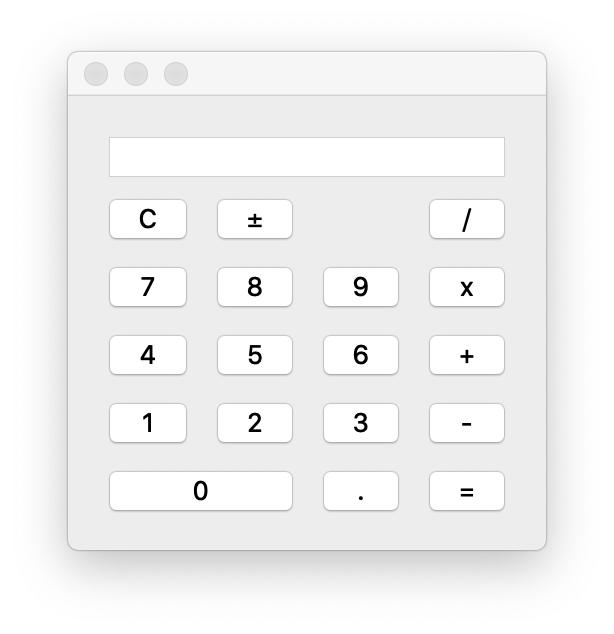

# Side topics

## Event handlers

Qt's main event loop (QCoreApplication.exec) fetches native window system events from the event queue, translates them into QEvents, and sends the translated events to QObjects.

In general, events come from the underlying window system, but it is also possible to manually send events using QCoreApplication.sendEvent and QCoreApplication.postEvent.

Things to note here:
- the application singleton instance
- the whole event routing
- the huge event list of event types (https://doc.qt.io/qt-5/qevent.html)
- the user event type and the registerEventType function
- classes that handle events usually have a method for that.
- sendEvent Vs postEvent


In [10]:
class Event(QtC.QEvent):
    def __init__(self, text):
        super().__init__(QtC.QEvent.User)
        self.text = text

class Window(QtW.QWidget):
    def __init__(self):
        super().__init__()
        
        self.label = QtW.QLabel('Hello World!')
        
        layout = QtW.QVBoxLayout()
        layout.addWidget(self.label)
        self.setLayout(layout)
    
    def event(self, event):
        if event.type() == QtC.QEvent.User:
            self.label.setText(event.text)
            return True
        return super().event(event)

    
class Window2(QtW.QWidget):
    
    def __init__(self):
        super().__init__()
        self._text = QtW.QLineEdit()
        layout = QtW.QVBoxLayout()
        layout.addWidget(self._text)
        self.setLayout(layout)
        
        self._text.textChanged.connect(self._set_text)
    
    def _set_text(self):
        event = Event(self._text.text())
        app.postEvent(window_1, event)

app = QtW.QApplication([])
window_1 = Window()
window_2 = Window2()
window_1.show()
window_2.show()
app.exec()
del app

## Main window

Things to note here:
- the toolbar
- the status bar

In [11]:
def main():
    app = QtW.QApplication([])
    main_window = QtW.QMainWindow()
    main_window.resize(800, 600)
    main_window.show()
    app.exec()
    
main()